In [1]:
!pip install ultralytics==8.0.196
from IPython import display

import ultralytics

In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8m.pt conf=0.5 source='/content/k.jpg'

/content
100% 49.7M/49.7M [00:00<00:00, 373MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/k.jpg: 448x640 1 person, 1200.2ms
Speed: 16.7ms preprocess, 1200.2ms inference, 26.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


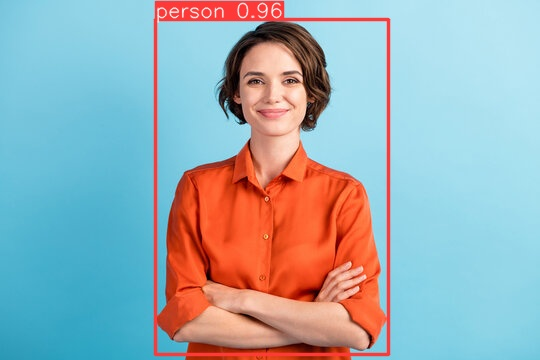

In [5]:
%cd {HOME}
Image(filename='/content/runs/detect/predict/k.jpg', height=600)

In [6]:
!pip install roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="P5XhIxSgrpFznCrXscOe")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-14 in yolov8:: 100%|██████████| 14682/14682 [00:02<00:00, 4978.12it/s]


In [7]:
pwd

'/content'

In [11]:
!yolo task=detect mode=train model=yolov8s.pt data='data.yaml' epochs=2 imgsz=128 #640

New https://pypi.org/project/ultralytics/8.2.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=2, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, clas

In [12]:
!ls {HOME}/runs/detect/train6/


args.yaml					     PR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			     R_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				     results.csv	    val_batch1_pred.jpg
events.out.tfevents.1720521554.574e7cc0a937.10426.0  results.png	    val_batch2_labels.jpg
F1_curve.png					     train_batch0.jpg	    val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg	    weights
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


/content


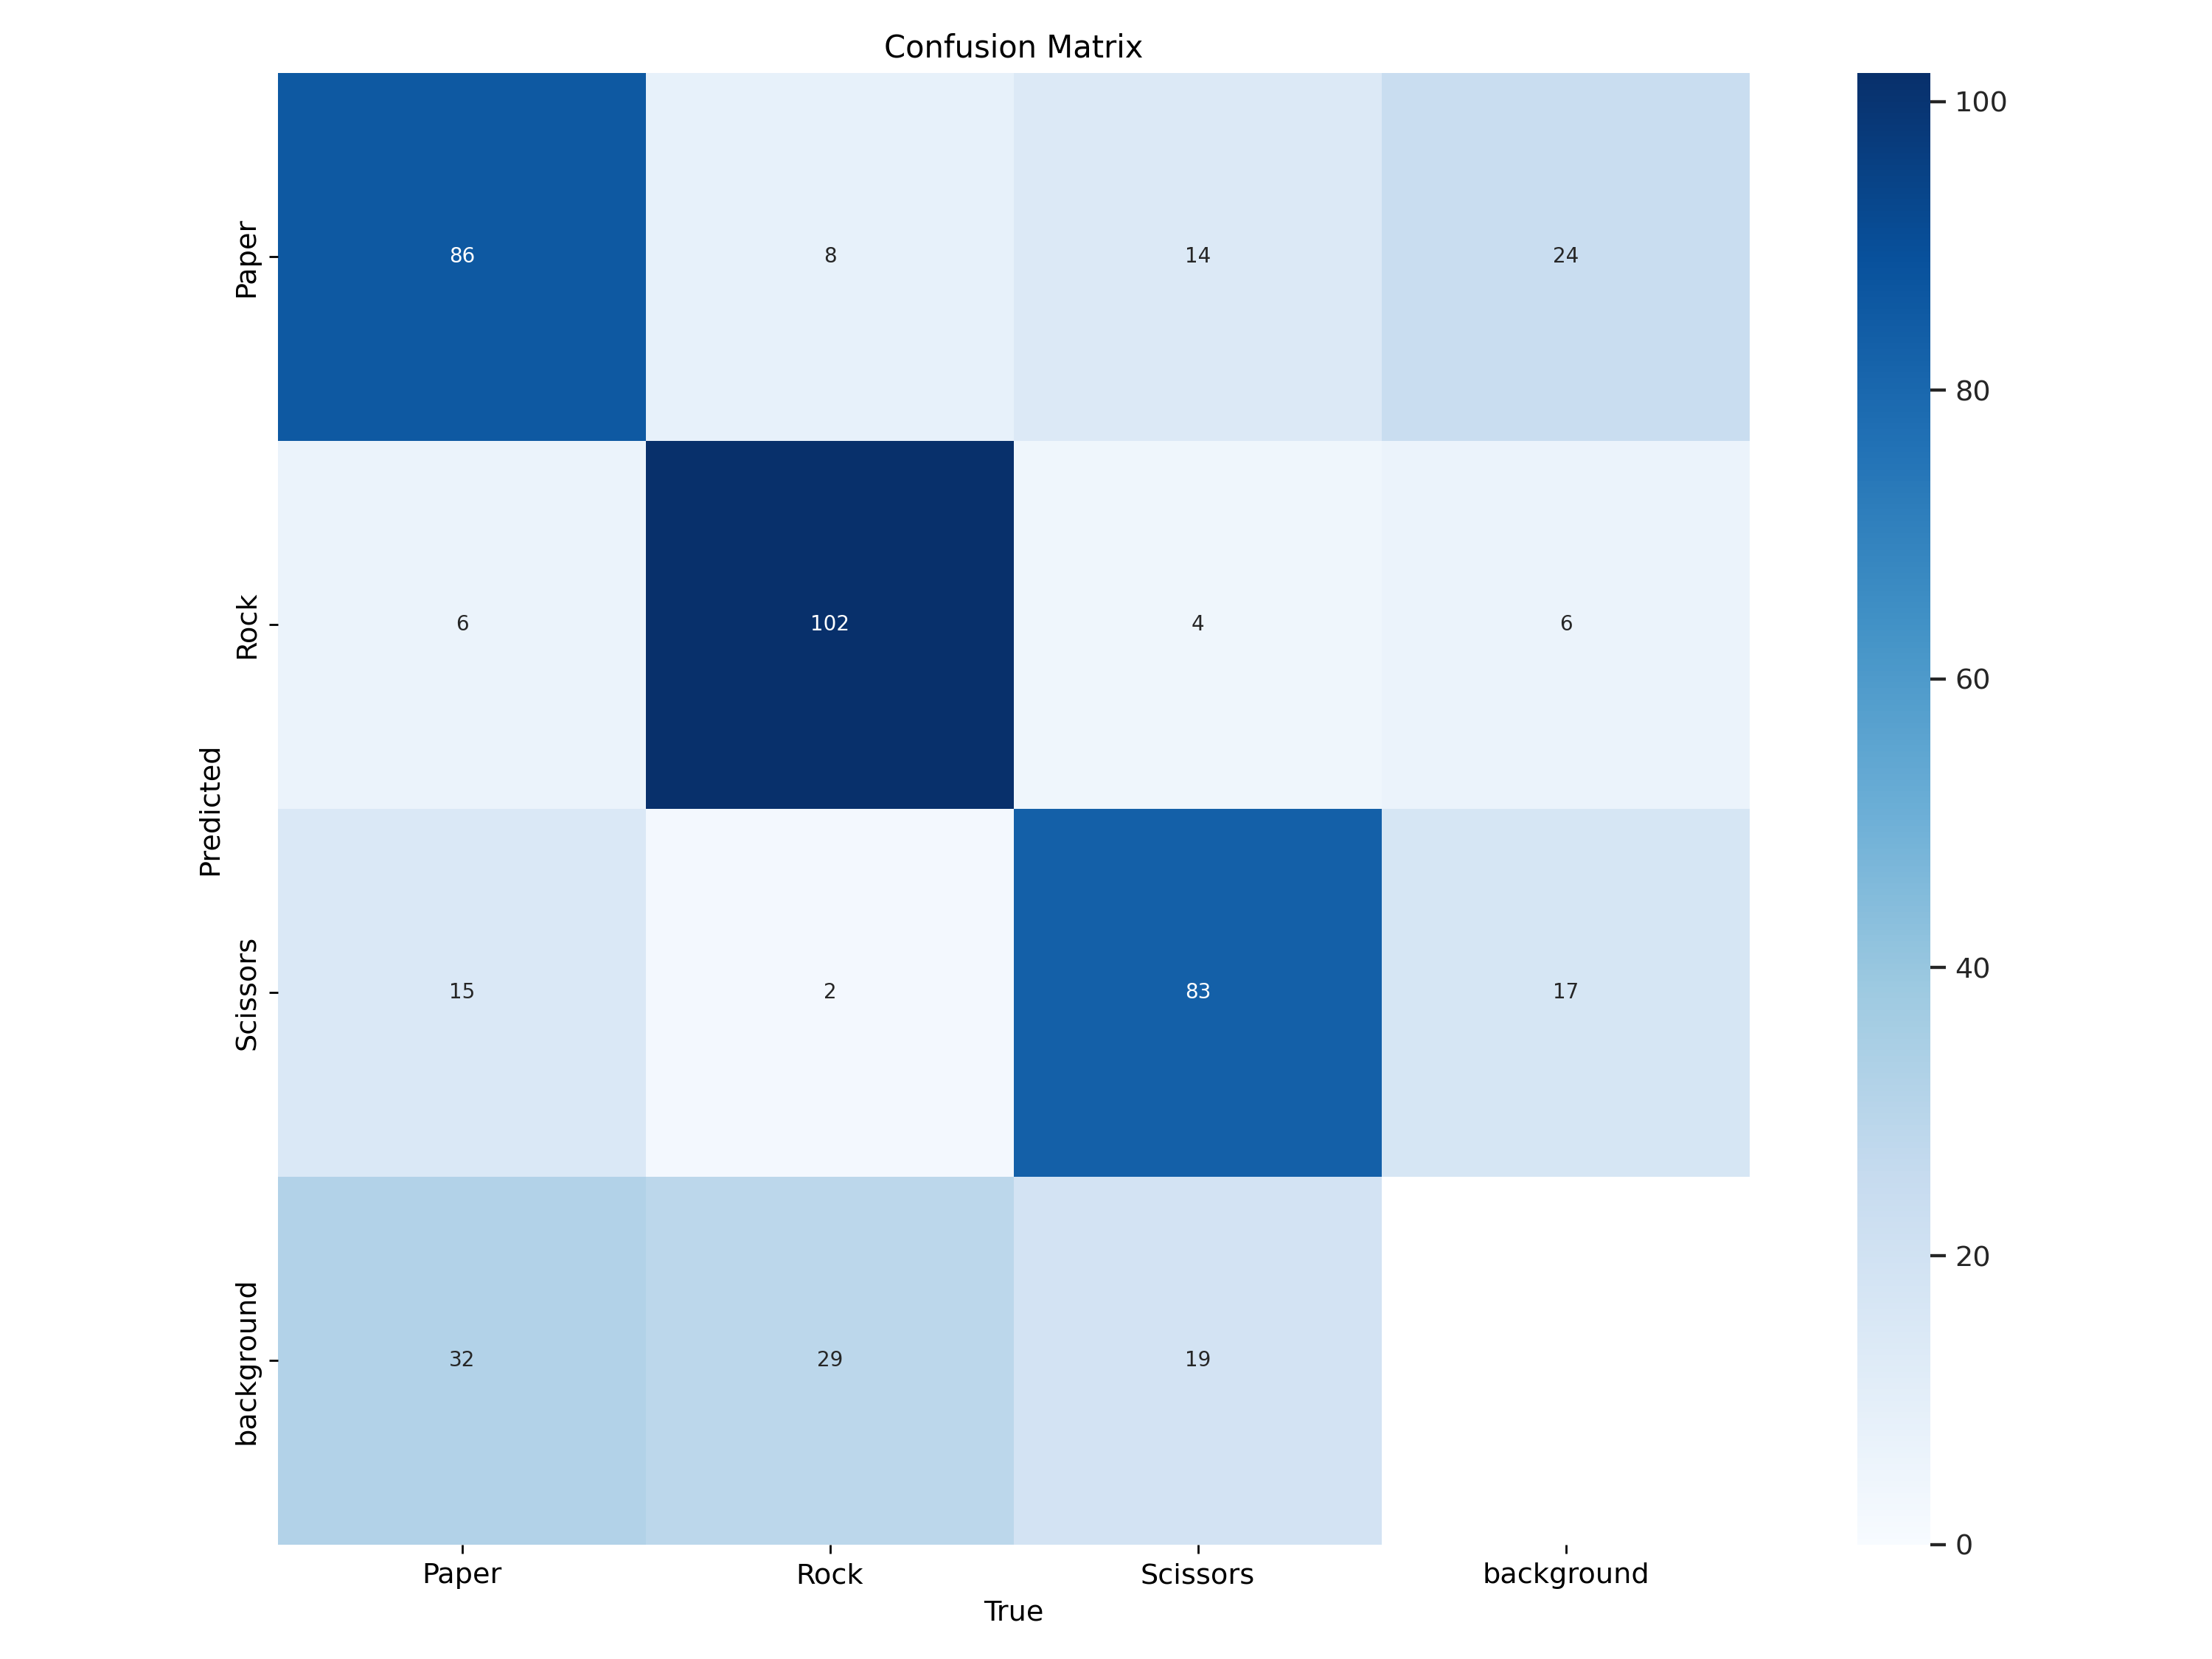

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


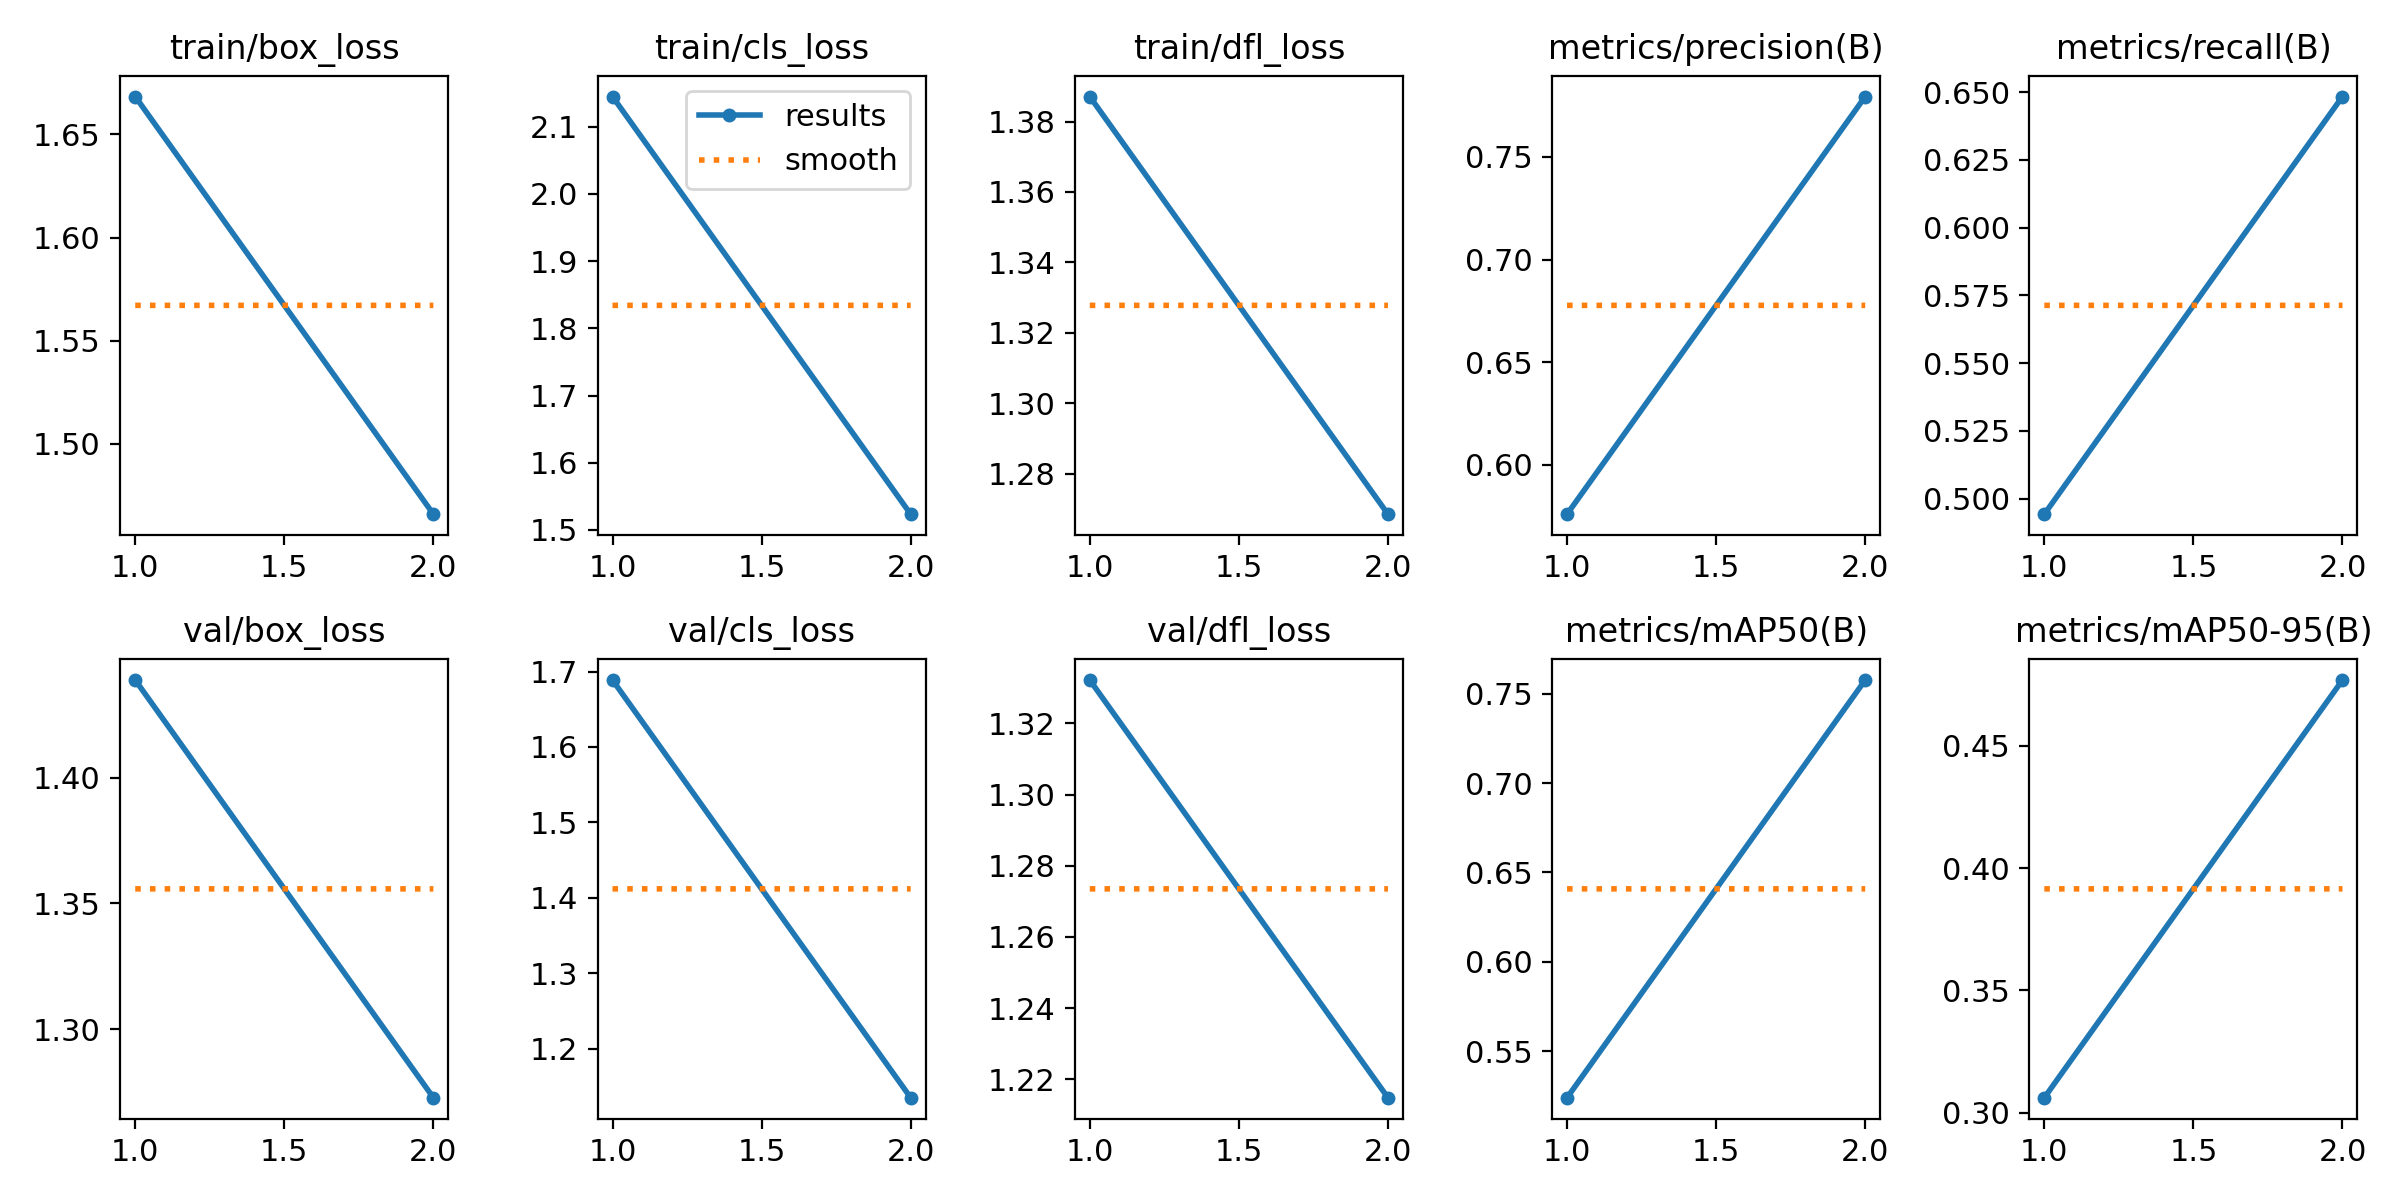

In [14]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

In [15]:

%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train6/weights/best.pt data='data.yaml'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Rock-Paper-Scissors-SXSW-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100% 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:33<00:00,  1.08it/s]
                   all        576        400      0.777      0.649      0.758      0.477
                 Paper        576        139      0.774      0.561      0.719      0.413
                  Rock        576        141      0.827      0.711      0.779      0.503
              Scissors        576        120      0.731      0.675      0.775      0.513
Speed: 0.1ms preprocess, 47.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train6/weights/best.pt conf=0.25 source='/content/Rock-Paper-Scissors-SXSW-14/test/images'


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 128x128 (no detections), 163.8ms
image 2/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 128x128 (no detections), 80.6ms
image 3/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 128x128 (no detections), 65.7ms
image 4/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 128x128 (no detections), 71.1ms
image 5/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 128x128 2 Papers, 66.6ms
image 6/304 /content/Rock-Paper-Scissors-SXSW-14/test/images/2022

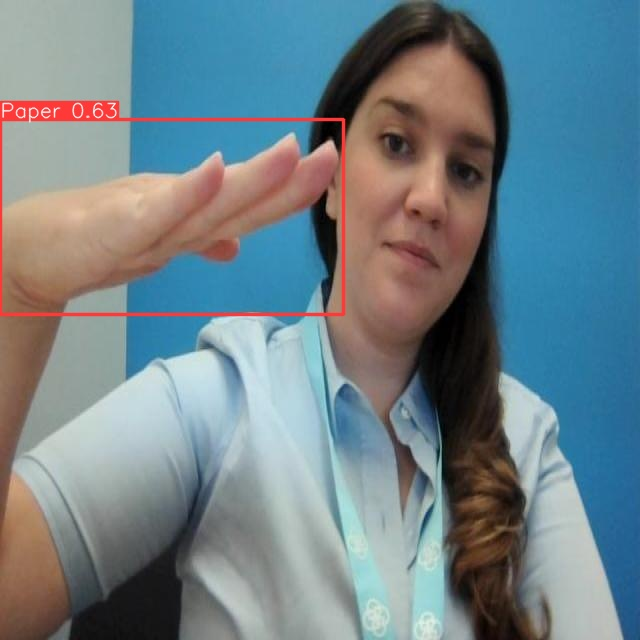

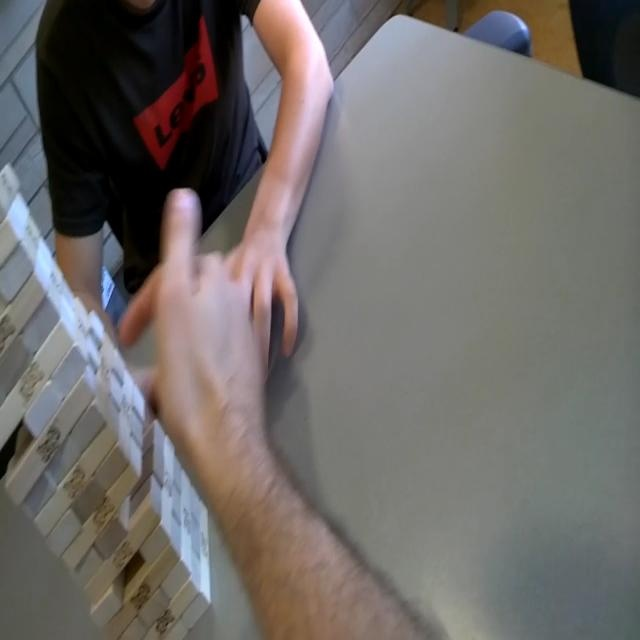

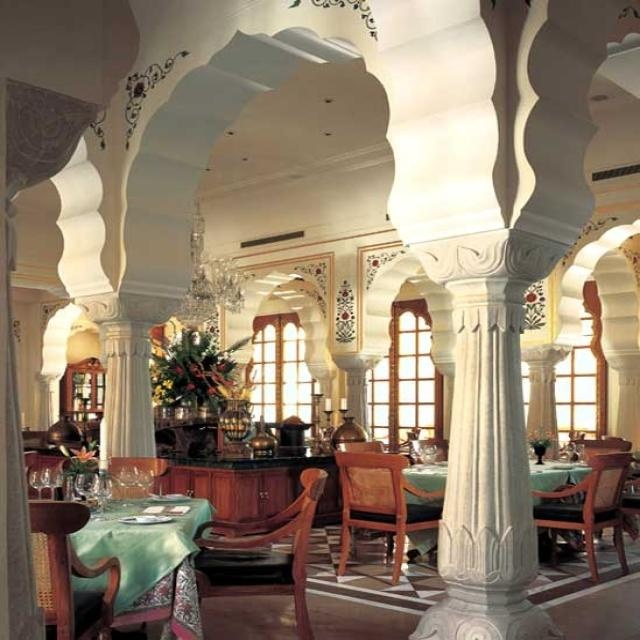

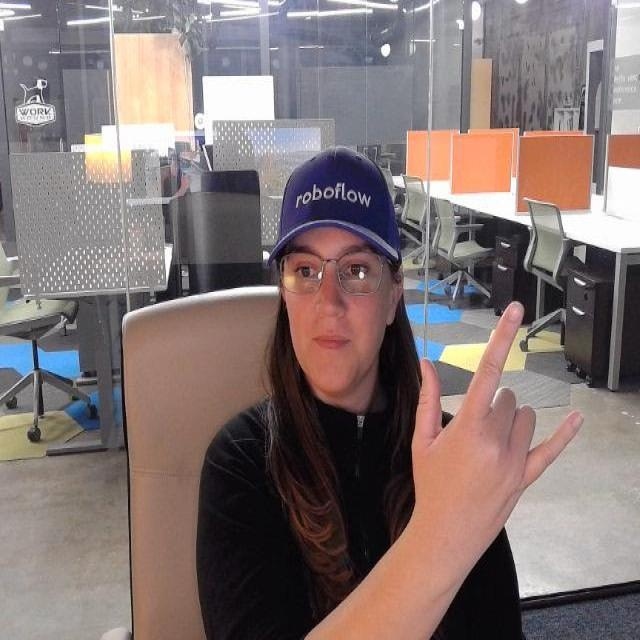

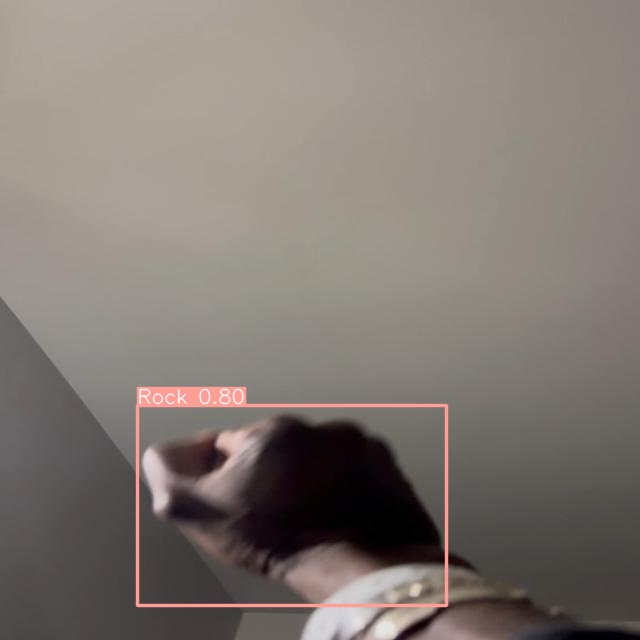

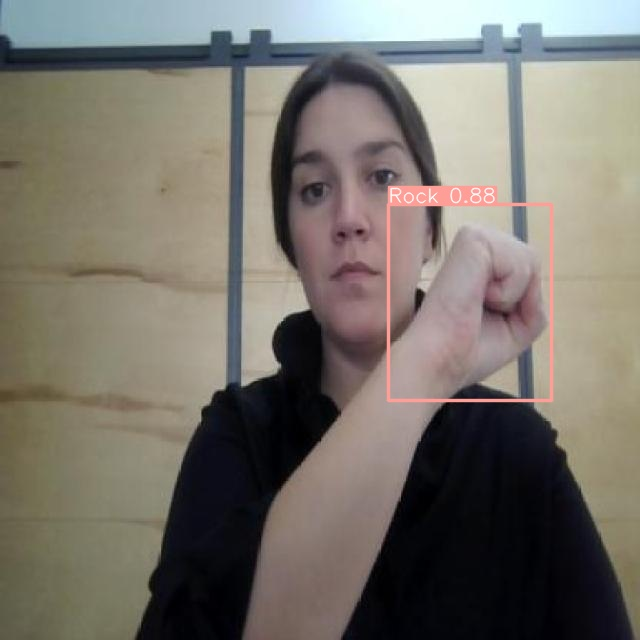

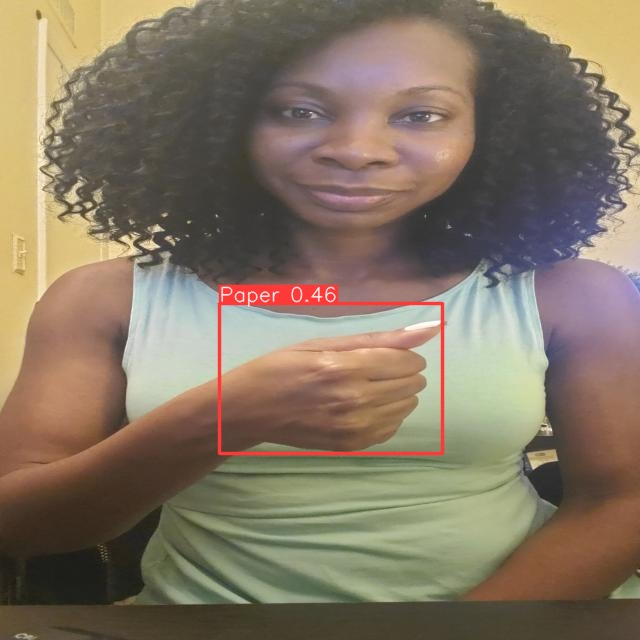

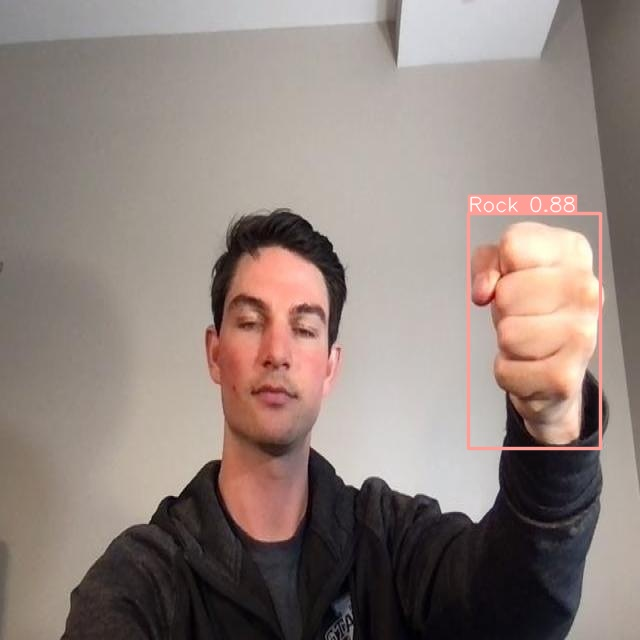

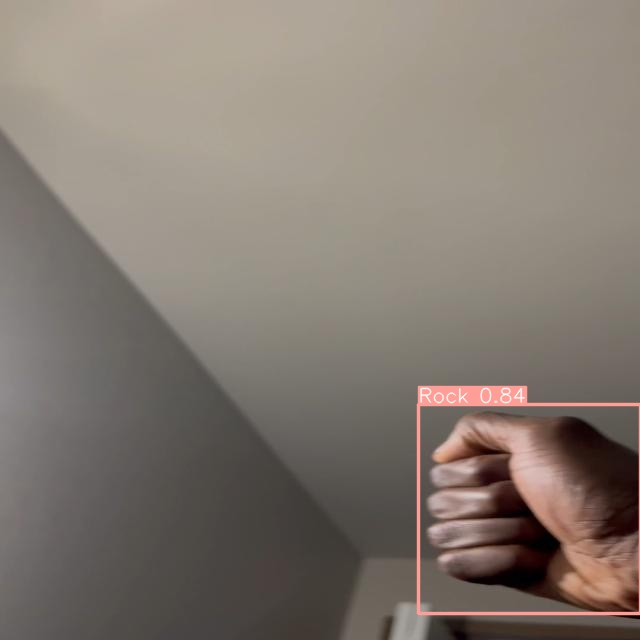

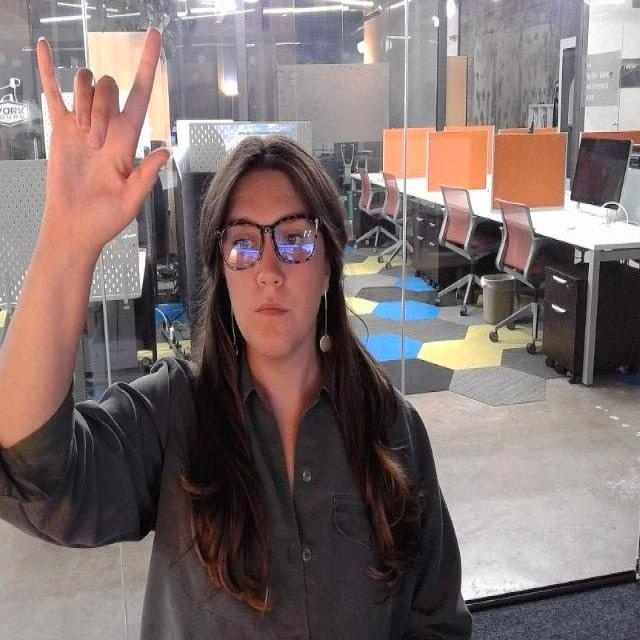

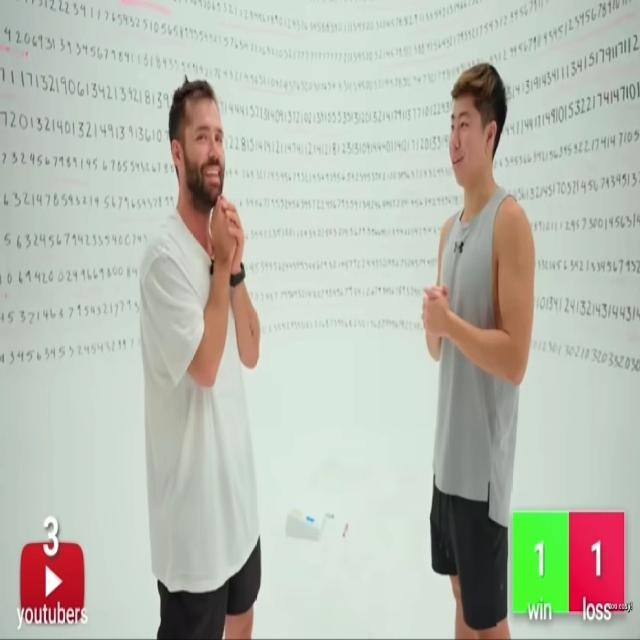

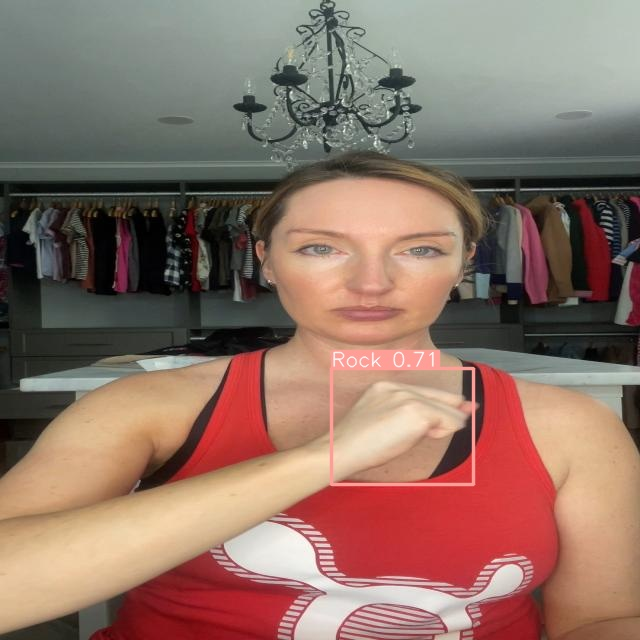

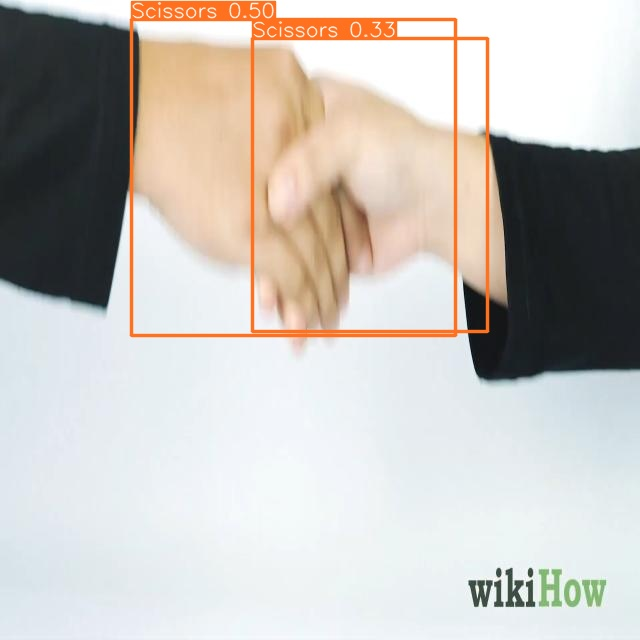

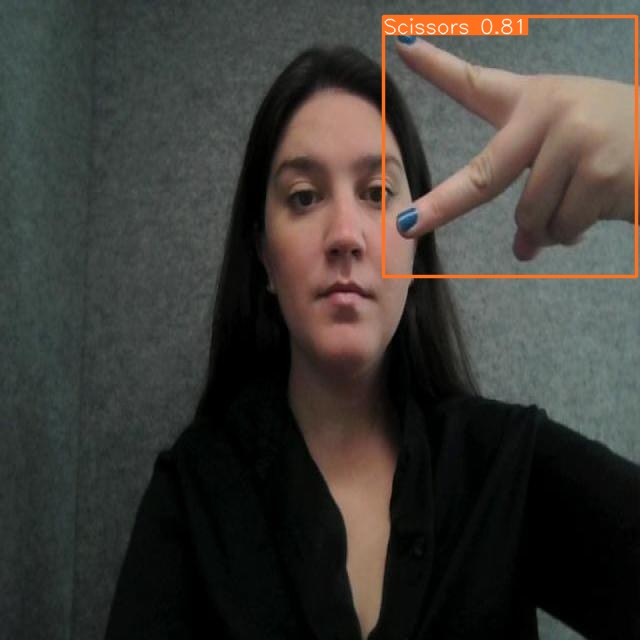

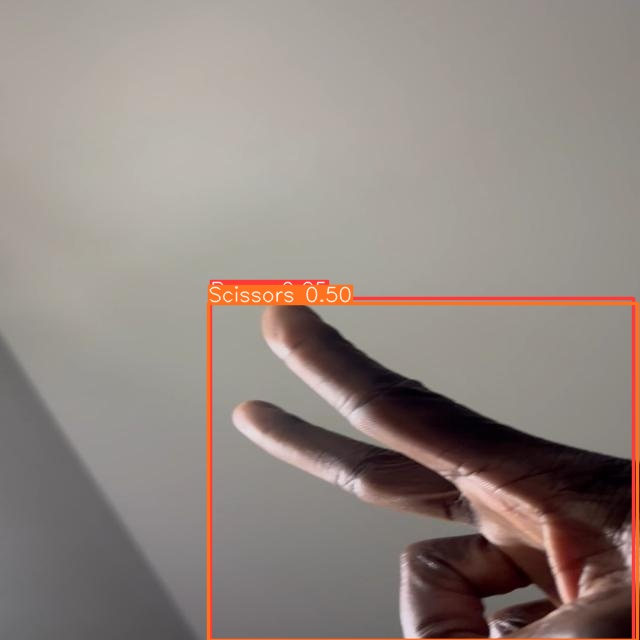

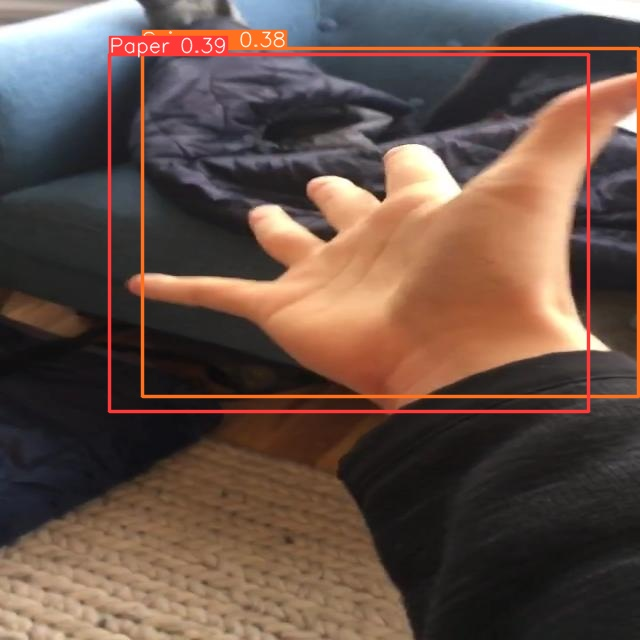

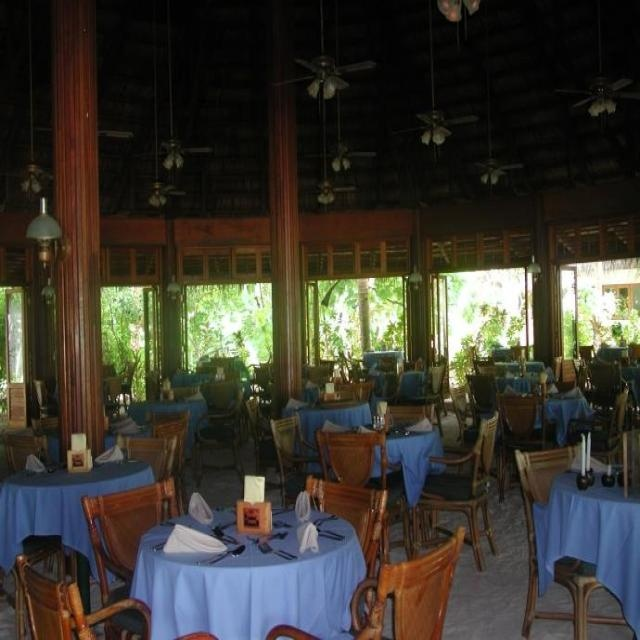

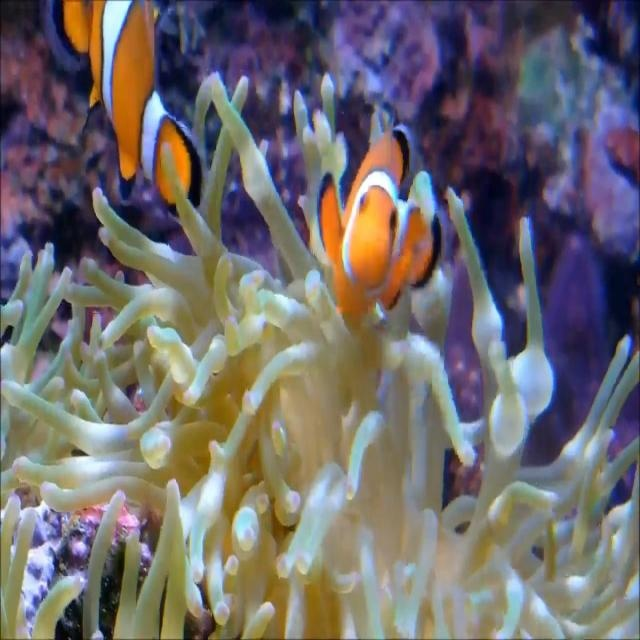

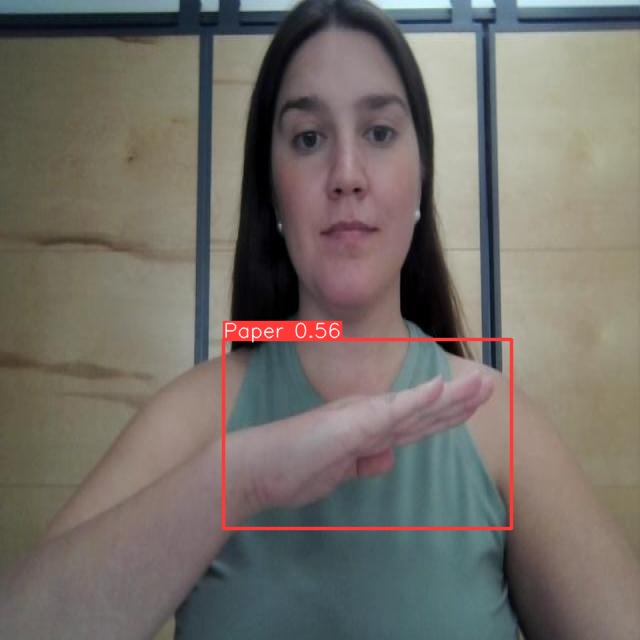

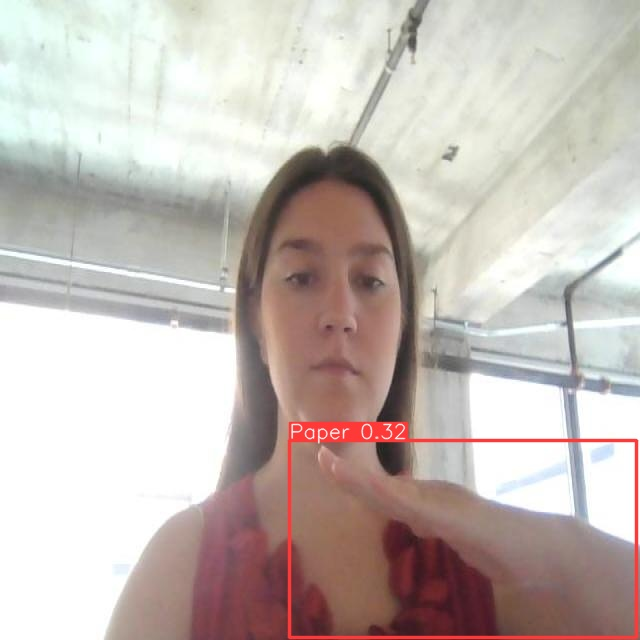

In [19]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")


**Regards, Tariq Ibrahim**